In [ ]:
# Where i try to load downloaded data into the program
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
IMG_SIZE=100
batch_size=100
#=============================#
def la_model():
    inputs=keras.Input(shape=(IMG_SIZE,IMG_SIZE,3))
    x=layers.Conv2D(32,3)(inputs)
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.MaxPooling2D()(x)
    x=layers.Dropout(0.25)(x)
    x=layers.Conv2D(64,5,padding="same")(x)
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.AveragePooling2D()(x)
    x=layers.Dropout(0.5)(x)
    x=layers.Conv2D(64,5,padding="same")(x)
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.AveragePooling2D()(x)
    x=layers.Dropout(0.5)(x)
    x=layers.Conv2D(256,3)(x)
    x=layers.BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=layers.Flatten()(x)
    x=layers.Dense(1024,activation="relu")(x)
    outputs=layers.Dense(10,activation="relu")(x)
    model=keras.Model(inputs=inputs,outputs=outputs)
    return model
model=la_model()
model.summary()
#=============================================#
ds_train=tf.keras.preprocessing.image_dataset_from_directory('/Users/skandah/Documents/Tomato_plant',labels="inferred",label_mode="int",batch_size=batch_size,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.1,subset="training",)
ds_validation=tf.keras.preprocessing.image_dataset_from_directory('/Users/skandah/Documents/Tomato_plant',labels="inferred",label_mode="int",batch_size=batch_size,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.1,subset="validation",)
def augment(x,y):
    image=tf.image.random_brightness(x,max_delta=0.05)
    return image ,y
ds_train=ds_train.map(augment)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.legacy.Adam(learning_rate=3e-4),metrics=["accuracy"],)
history= model.fit(ds_train,epochs=10,verbose=2)
model.evaluate(ds_validation,verbose=2)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.save("/Users/skandah/Documents/my_model.keras")

Found 25060 files belonging to 10 classes.
Using 22554 files for training.
Found 25060 files belonging to 10 classes.
Using 2506 files for validation.
Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                 

                                                                                                  
 expanded_conv_1/depthwise (Dep  (None, None, None,   648        ['expanded_conv_1/depthwise/pad[0
 thwiseConv2D)                  72)                              ][0]']                           
                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_

                                96)                              Norm[0][0]',                     
                                                                  'tf.math.multiply_3[0][0]']     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_

                                                                                                  
 tf.__operators__.add_7 (TFOpLa  (None, 1, 1, 240)   0           ['expanded_conv_4/squeeze_excite/
 mbda)                                                           Conv_1[0][0]']                   
                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Mul

 /Mul (Multiply)                240)                              'tf.math.multiply_10[0][0]']    
                                                                                                  
 expanded_conv_5/project (Conv2  (None, None, None,   9600       ['expanded_conv_5/squeeze_excite/
 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
          

 expanded_conv_7/expand/BatchNo  (None, None, None,   576        ['expanded_conv_7/expand[0][0]'] 
 rm (BatchNormalization)        144)                                                              
                                                                                                  
 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)       

 a)                             288)                                                              
                                                                                                  
 multiply_11 (Multiply)         (None, None, None,   0           ['expanded_conv_8/expand/BatchNor
                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseCon

 tf.__operators__.add_21 (TFOpL  (None, None, None,   0          ['expanded_conv_9/depthwise/Batch
 ambda)                         576)                             Norm[0][0]']                     
                                                                                                  
 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
          

                                576)                             hNorm[0][0]',                    
                                                                  'tf.math.multiply_24[0][0]']    
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_

None
Epoch 1/10


2023-11-18 06:58:20.804682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [22554]
	 [[{{node Placeholder/_4}}]]
2023-11-18 06:58:20.804898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [22554]
	 [[{{node Placeholder/_4}}]]
2023-11-18 06:58:20.838313: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 - 134s - loss: 0.7815 - accuracy: 0.8056 - 134s/epoch - 952ms/step
Epoch 2/10
141/141 - 137s - loss: 0.0749 - accuracy: 0.9745 - 137s/epoch - 972ms/step
Epoch 3/10
141/141 - 128s - loss: 0.0247 - accuracy: 0.9930 - 128s/epoch - 910ms/step
Epoch 4/10
141/141 - 129s - loss: 0.0124 - accuracy: 0.9966 - 129s/epoch - 915ms/step
Epoch 5/10
141/141 - 128s - loss: 0.0084 - accuracy: 0.9973 - 128s/epoch - 908ms/step
Epoch 6/10
141/141 - 129s - loss: 0.0058 - accuracy: 0.9985 - 129s/epoch - 918ms/step
Epoch 7/10
141/141 - 128s - loss: 0.0053 - accuracy: 0.9986 - 128s/epoch - 905ms/step
Epoch 8/10
141/141 - 128s - loss: 0.0045 - accuracy: 0.9990 - 128s/epoch - 911ms/step
Epoch 9/10
141/141 - 128s - loss: 0.0043 - accuracy: 0.9984 - 128s/epoch - 908ms/step
Epoch 10/10
141/141 - 130s - loss: 0.0044 - accuracy: 0.9986 - 130s/epoch - 919ms/step


2023-11-18 07:20:00.749664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2506]
	 [[{{node Placeholder/_4}}]]
2023-11-18 07:20:00.749880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2506]
	 [[{{node Placeholder/_4}}]]


16/16 - 4s - loss: 0.2500 - accuracy: 0.9421 - 4s/epoch - 239ms/step


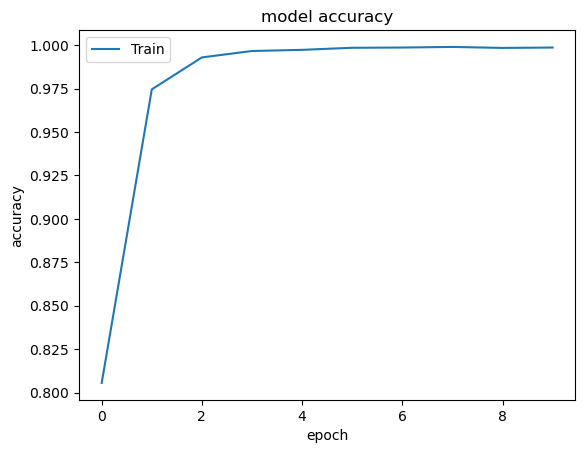

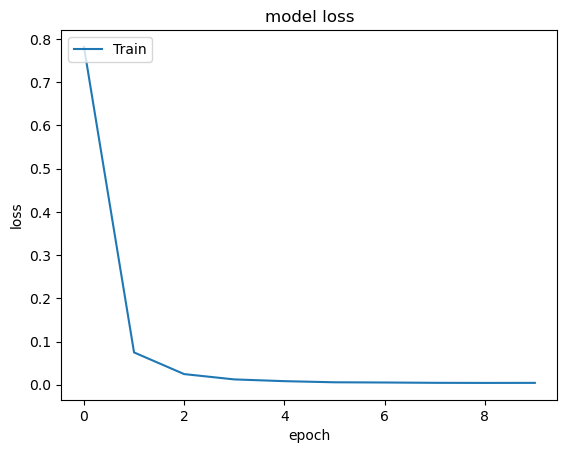

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from keras.applications import EfficientNetB0
from keras.applications import MobileNetV3Small
IMG_SIZE=160
batch_size=160
ds_train=tf.keras.preprocessing.image_dataset_from_directory('/Users/skandah/Documents/Tomato_plant',labels="inferred",label_mode="int",batch_size=batch_size,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.1,subset="training",)
ds_validation=tf.keras.preprocessing.image_dataset_from_directory('/Users/skandah/Documents/Tomato_plant',labels="inferred",label_mode="int",batch_size=batch_size,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=123,validation_split=0.1,subset="validation",)
def augment(x,y):
    image=tf.image.random_brightness(x,max_delta=0.05)
    return image ,y
ds_train=ds_train.map(augment)
model = MobileNetV3Small()
print(model.summary())
base_input=model.layers[0].input
base_output=model.layers[-2].output
final_output=layers.Dense(10,activation="relu")(base_output)
new_model=keras.Model(inputs=base_input,outputs=final_output)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer=keras.optimizers.legacy.Adam(learning_rate=3e-4),metrics=["accuracy"],)
history= model.fit(ds_train,epochs=10,verbose=2)
model.evaluate(ds_validation,verbose=2)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.save("/Users/skandah/Documents/my_modelhash.keras")